In [78]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [79]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [80]:
# Path ke gambar input dan background
DATA_IMAGE = "/content/drive/MyDrive/dataset-colab/SampleBS/jalan.png"
DATA_IMAGE_BG = "/content/drive/MyDrive/dataset-colab/SampleBS/jalanbg.png"

# Membaca gambar input dan background
image = cv2.imread(DATA_IMAGE)
image_bg = cv2.imread(DATA_IMAGE_BG)

In [81]:
# Konversi ke grayscale
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image_bg_gray = cv2.cvtColor(image_bg, cv2.COLOR_BGR2GRAY)

# Background differencing (pengurangan latar belakang)
difference = cv2.absdiff(image_gray, image_bg_gray)

# Thresholding untuk membentuk mask
_, mask = cv2.threshold(difference, 50, 255, cv2.THRESH_BINARY)

cv2.imwrite("mask_output.png", mask)

True

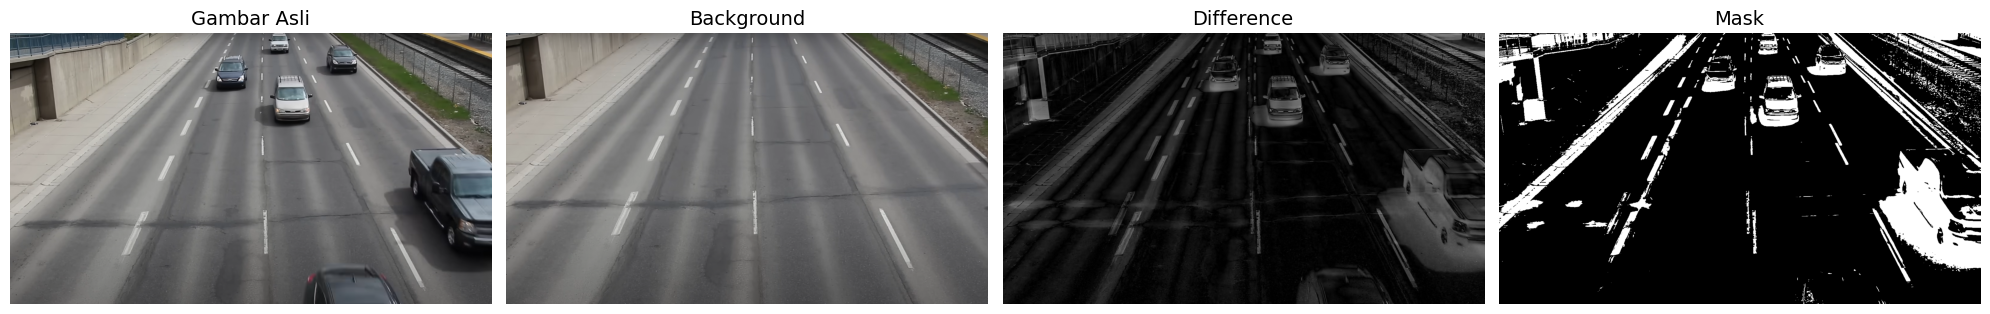

In [82]:
# Visualisasi hasil
plt.figure(figsize=(20, 10))

# Gambar Asli
plt.subplot(1, 4, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Gambar Asli', fontsize=14)
plt.axis('off')

# Background
plt.subplot(1, 4, 2)
plt.imshow(cv2.cvtColor(image_bg, cv2.COLOR_BGR2RGB))
plt.title('Background', fontsize=14)
plt.axis('off')

# Difference
plt.subplot(1, 4, 3)
plt.imshow(cv2.cvtColor(difference, cv2.COLOR_GRAY2RGB))
plt.title('Difference', fontsize=14)
plt.axis('off')

# Mask
plt.subplot(1, 4, 4)
plt.imshow(cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB))
plt.title('Mask', fontsize=14)
plt.axis('off')

plt.tight_layout()
plt.show()

In [83]:
DATA_VIDEO = "/content/drive/MyDrive/dataset-colab/SampleBS/traffic-video.mp4"
cap = cv2.VideoCapture(DATA_VIDEO)

In [84]:
# Jika gagal membuka video
if not cap.isOpened():
    print("Gagal membuka video")
    exit()

# Mengambil ukuran frame dari video
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Inisialisasi penulis video hasil (VideoWriter)
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('hasil_substraction.mp4', fourcc, 20.0, (frame_width, frame_height), isColor=False)

# Jika gagal menyimpan video
if not out.isOpened():
    print("Gagal menyimpan video")
    exit()

# Inisialisasi background subtractor
bg_subtractor = cv2.createBackgroundSubtractorMOG2(history=100, varThreshold=50, detectShadows=False)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Menerapkan background subtraction
    fg_mask = bg_subtractor.apply(frame)

    # Simpan ke video hasil
    out.write(fg_mask)

# Bersihkan resource
cap.release()
out.release()

print("Backgorund Substraction pada video tersimpam")

Backgorund Substraction pada video tersimpam
